# Raumluftqualität 3.0

In realen Gebäuden gibt es immer einen Luftaustausch mit der Umgebung. In modernen Gebäuden ist dieser aufgrund der hochwertigen Abdichtung nach einem Blowerdoortest sehr gering. Dann müssen Gebäude mechanisch belüftet werden, um Schadstoffe abzutransportieren und die Räume mit frischer Außenluft zu versorgen.

Wird ein Gebäude belüftet, so lässt sich bei bekannter Schadstoffproduktion und bei bekannten Konzentrationen der Raumluft und der Außenluft berechnen, welcher Volumenstrom zur Belüftung erforderlich ist. 

Dazu diente die Gleichgewichtsbetrachtung, dass aus dem Raum genauso viel Schadstoff über die Abluft abtransportiert werden muss, wie über die Außenluft und durch die Schadstoffquellen zugeführt wird.

Der erforderliche Außenluftvolumenstrom ist:

$$
  \dot V_{\rm au} = \dfrac{\dot V_{\rm sch}}{k_{\rm zul} - k_{\rm au}}.
$$

Im nächsten Schritt wird die Frage untersucht, wie sich die Schadstoffkonzentration in einem belüfteten Raum im Laufe der Zeit verändert. Dazu gehen wir zunächst von einem gut durchlüfteten Raum aus. Die CO_2-Konzentration in einem gut durchlüfteten Raum wird mit der CO_2-Konzentration der Außenluft übereinstimmen. Zu Beginn ist also

$$
  k_0 = k_{\rm au}
$$

Zu einer beliebigen Zeit $t$ lässt sich die Schadstoffkonzentration $k(t)$ der Raumluft nach der folgenden Funktion berechnen:

$$
  k(t)= k_\infty + (k_0-k_\infty)\cdot{\mathrm e}^{-\beta\,(t-t_0)}
$$

Dabei ist $k_\infty$ der Endwert, der sich nach (theoretisch unendlich) langer Zeit einstellt. Das Zeichen $\infty$ wird mathematisch als "Unendlich" gelesen. $k_0$ ist der Startwert zur Zeit $t=t_0$, wobei meistens $t_0=0$ gesetzt wird. Manchmal ist es aber bequem, nicht bei $t_0=0$ beginnen zu müssen, sondern zu einer beliebigen Zeit.

In einem gut durchlüfteten Raum ist $k_0 = k_\rm{au} \approx 400\,\rm{ppM}$.

Der Wert $k_\infty$ ist die Schadstoffkonzentration, die sich im Gleichgewicht zwischen Schadstoffzufuhr und -abtransport ergibt. Sie ist bekannt, wenn der Außenluftvolumenstrom $\dot V_{\rm au}$ und die Schadstoffproduktion $\dot V_\rm{sch}$ bekannt sind. Es ist nämlich

$$
  \dot V_{\rm au} = \dfrac{\dot V_{\rm sch}}{k_\infty -k_{\rm au}}
$$

Nach $k_\infty$ umgestellt, ergibt sich

$$
  k_\infty = 
  k_{\rm au} + \dfrac{\dot V_{\rm sch}}{\dot V_{\rm au}}
$$

### Beispiel

Ein Gebäude mit einer Grundfläche von $150\,{\rm m^2}$ und einer Geschosshöhe von $2.50\,{\rm m}$ wird mit 
$180\,{\rm \dfrac{m^3}{h}}$ Außenluft belüftet. Zu Beginn ist die Schadstoffkonzentration $k_0=400\,\rm ppM$. Der Schadstoffvolumenstrom ist $540\,\rm\dfrac{\ell}{h}$ CO_2.

Berechnen Sie, welche Schadstoffkonzentration sich im Gebäude einstellt und stellen Sie den zeitlichenn Verlauf von $k(t)$ für einen 8-Stundentag dar.

#### Lösung

Zunächst wird das Raumvolumen berechnet. Es ergibt sich zu

$$
  V_\rm{ra} = 150\cdot 2.5\,\rm{m}^2 = 375\,\rm{m}^2
$$

oder, mittels Jupyter:

In [1]:
# Raumvolumen
V_ra = 150*2.5 # m**3
V_ra

375.0

Im nächsten Schritt wird daraus die CO_2-Konzentration $k_\infty$ ermittelt:

$$
  k_\infty = k_\rm{au} + \dfrac{\dot V_\rm{sch}}{\dot V_\rm{ra}}
  = 400\,\rm{ppM} + \dfrac{540\cdot 10^{-3}\,\rm{m}^3}{375\,\rm{m}^3}
  = 3400\,\rm{ppM}
$$

oder, mittels Jupyter:

In [2]:
# Schadstoffvolumenstrom (CO_2):
dV_sch = 540e-3 # 180 l/h

# CO_2-Konzentration der Außenluft
k_0 = 400e-6 # 400 ppM

# bekannter Außenluftvolumenstrom
dV_au = 180 # m**3/h

# Daraus berechneter Endwert der Konzentration 
k_inf = k_0 + dV_sch/dV_au

# Kontrollausgabe in ppM
k_inf*1e6 # ppM

3400.0000000000005

Die Luftwechselzahl ergibt sich durch

$$
  \beta = \dfrac{\dot V_\rm{au}}{V_\rm{ra}} = 0.48\,\rm\dfrac{1}{h}
$$

oder, mittels Jupyter:

In [3]:
# Luftwechselzahl beta:
beta = dV_au/V_ra # 1/h
beta

0.48

Für das Plotten wird hier nur das Jupyter Notebook verwendet:

In [4]:
# Plotten vorbereiten
from matplotlib import pyplot as plt
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

In [11]:
# Das Zeitintervall auf der x-Achse:
lt = np.linspace(0,4,17) # 0..4h

# Der Dataframe
df = pd.DataFrame(
    {
        't': lt,
        'k': 1e6*(k_inf + (k_0-k_inf)*np.exp(-beta*lt)) # k in ppM
    }
)

# Kontrollausdruck
df.head().T

,0,1,2,3,4
t,0.0,0.25000,0.500000,0.750000,1.000000
k,400.0,739.23869,1040.116417,1306.971022,1543.649825


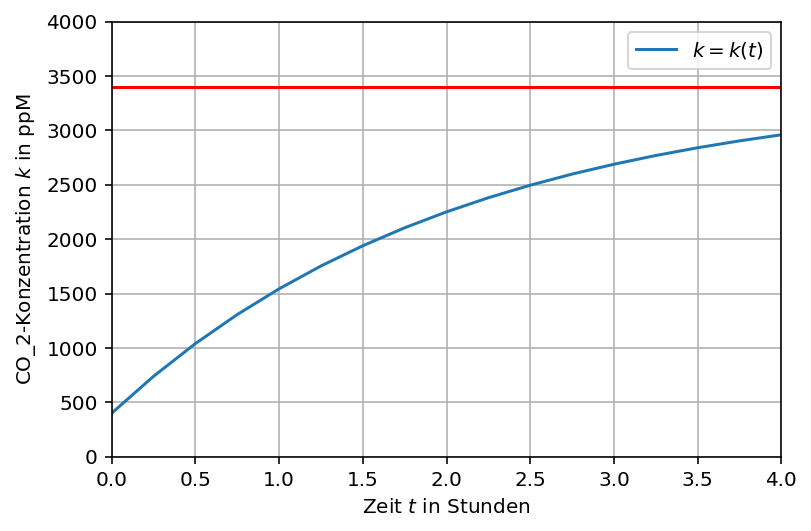

In [17]:
# Zeitliche Entwicklung der CO_2-Konzentragion im Diagramm
ax = df.plot(x='t',y='k',label="$k = k(t)$")
ax.axhline(1e6*k_inf,c='r')
ax.grid()
ax.set(
    ylim=(0,4000), ylabel=r'CO_2-Konzentration $k$ in $\rm ppM$',
    xlim=(0,4), xlabel=r'Zeit $t$ in Stunden'
);

Man erkennt, dass bereits nach etwa 30 Minuten die Grenze von 1000 ppM erreicht wird. Nach etwas über 90 Minuten ist die Raumluftqualität nicht mehr akzeptabel.

## Die Schadstoffbilanz des Raumes nach einem Zeitschritt

Herleitung der Lösung.

Im nächsten Schritt wird untersucht, wie sich $k$ verändert, nachdem der Raum eine bestimmte Zeit $\Delta t$ belüftet worden ist. 

- Von den Personen (oder sonstigen Schadstoffquellen) im Raum wird eine bestimmte Schadstoffmenge abgegeben, 
  nämlich
  $$
    \dot V{\rm sch}\cdot\Delta t
  $$
- Mit der Außenluft wird eine bestimmte Schadstoffmenge in den Raum hineingetragen, nämlich
  $$
    k_{\rm au}\cdot\dot V_{\rm au}\cdot\Delta t
  $$
- Mit der Abluft wird eine bestimmte Schadstoffmenge aus dem Raum herausgetragen, nämlich
  $$
    k_0\cdot\dot V_{\rm ab}\cdot\Delta t
  $$
  
Damit ergibt sich:

$$
  k_1 \cdot V_{\rm ra} = 
    k_0 \cdot V_{\rm ra} 
  + \dot V{\rm sch}\cdot\Delta t 
  + k_{\rm au}\cdot\dot V_{\rm au}\cdot\Delta t 
  - k_0\cdot\dot V_{\rm ab}\cdot\Delta t
$$

Oder, wenn durch das Raumvolumen dividiert wird:

$$
  k_1 = 
    k_0 
  + \dfrac{\dot V{\rm sch}}{V_{\rm ra}}\cdot\Delta t 
  + k_{\rm au}\cdot\dfrac{\dot V_{\rm au}}{V_{\rm ra}}\cdot\Delta t 
  - k_0\cdot\dfrac{\dot V_{\rm ab}}{V_{\rm ra}}\cdot\Delta t
$$

Nun ist $\dfrac{\dot V_{\rm au}}{V_{\rm ra}} = \dfrac{\dot V_{\rm ab}}{V_{\rm ra}} = \beta$ gerade die Luftwechselzahl des Raumes. Deshalb ist

$$
 k_1 =
    k_0
 + \dfrac{\dot V{\rm sch}}{V_{\rm ra}}\cdot\Delta t 
 + k_{\rm au}\cdot\beta\cdot\Delta t 
 - k_0\cdot\beta\cdot\Delta t
$$

oder, zusammengefasst:

$$
  k_1 = 
     k_0\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
$$

Genau so, wie $k_1$ aus $k_0$ berechnet wurde, lässt sich $k_2$ aus $k_1$ berechnen, u.s.w. Das führt der Reihe nach auf

\begin{align}
    k_1 &= 
     k_0\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
  \\[2ex]
  k_2 &= 
     k_1\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
  \\[2ex]
  k_3 &= 
     k_2\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
  \\[2ex]
  k_4 &= 
     k_3\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
  \\[2ex]
   &\,\,\vdots
  \\
   &=
   \\
   &\,\,\vdots
   \\[2ex]
  k_{n} &= 
     k_{n-1}\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
\end{align}

Da der Unterschied zwischen $k_{n}$ und $k_{n-1}$ immer kleiner wird, gilt schließlich

\begin{align}
  k_{\infty} &= 
     k_{\infty}\cdot\left(1 -\beta\cdot\Delta t \right) 
  + \left(\dfrac{\dot V{\rm sch}}{V_{\rm ra}}
  + k_{\rm au}\cdot\beta\right)\cdot\Delta t 
\end{align}

wobei der Wert $k_\infty$ nach (theoretisch) unendlich langer Zeit erreicht wird.

Bildet man nun die Differenzen $k_1 - k_\infty$, $k_2-k_\infty$, $\ldots$ $k_{n+1} - k_\infty$, so ergeben sich die einfacheren Formeln

\begin{align}
  k_1 - k_\infty &= (k_0 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right) \\
  k_2 - k_\infty &= (k_1 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right) 
                  = (k_0 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)^2\\
  k_3 - k_\infty &= (k_2 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)
                  = (k_0 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)^3\\
  k_4 - k_\infty &= (k_3 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)
                  = (k_0 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)^4\\
                 &\,\,\vdots\\
                 &= \\
                 &\,\,\vdots\\
  k_n - k_\infty &= (k_{n-1} - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)
                  = (k_0 - k_\infty)\cdot\left(1 -\beta\cdot\Delta t \right)^n\\
\end{align}

Lässt man nun das Zeitintervall $\Delta t$ immer kleiner werden, so werden immer mehr Zeitschritte benötigt, um den Zeitpunkt $t = n\cdot\Delta t$ zu erreichen. Es ergibt sich 

$$
  t = n\cdot\Delta t \implies \Delta t = \dfrac{t}{n}
$$

und, mit der Eulerschen Formel für die Funktion ${\rm e}^x$, nach der

$$
  \lim_{n\to\infty} 
  \left(
    1 + \dfrac{x}{n}
  \right)^n
  = {\rm e}^x
$$

ist:

$$
  (1-\beta\cdot\Delta t)^n = \left(1-\dfrac{\beta\,t}{n}\right)^n \to {\mathrm e}^{-\beta\,t}
  \quad\text{für}\quad n\to\infty
$$

Wegen $n\cdot\Delta t = t$ kann man $k_n$ durch $k(t)$ ersetzen. Damit ergibt sich schließlich die Formel

$$
  k(t) - k_\infty = (k_0 - k_\infty)\cdot{\mathrm e}^{-\beta\,t}
$$

Dies Ergebnis schreibt man auch in der Form

$$
  k(t) = k_\infty + (k_0 - k_\infty)\cdot{\mathrm e}^{-\beta\,t}
$$